## AT&T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from analysis import (
    race, income, redlining, plot_race, 
    speed_breakdown, unserved, bucket_and_bin
)

In [3]:
# inputs
fn_att = '../data/output/speed_price_att.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_att.csv'
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [4]:
att = pd.read_csv(fn_att, compression='gzip')
len(att)

/home/chino/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


443949

In [5]:
att.major_city.nunique()

20

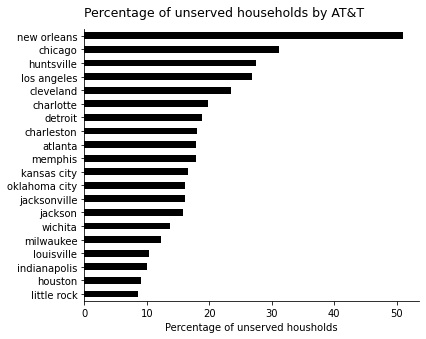

In [6]:
unserved(att, isp='AT&T')

In [7]:
att = att[att.speed_down != 0]
len(att)

356051

In [8]:
att = bucket_and_bin(att)

In [9]:
upspeed = 10
len(att[att.speed_up >= upspeed]) / len(att)

0.7451039317401159

/home/chino/code/1_production-grade/isp/notebooks/analysis.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


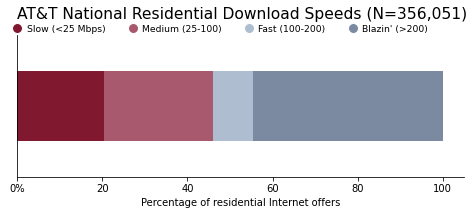

In [10]:
speed_breakdown(att)

In [11]:
pd.DataFrame(att.speed_down_bins.value_counts(normalize=True).sort_index()[1:]).to_csv(fn_speed)

/home/chino/code/1_production-grade/isp/notebooks/analysis.py:431: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


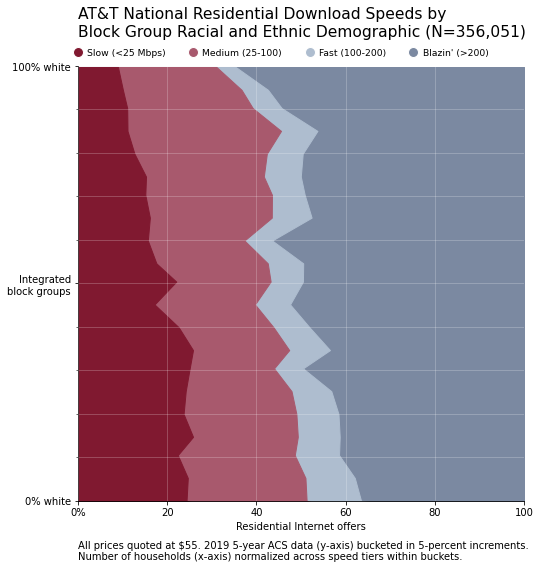

In [12]:
plot_race(att)

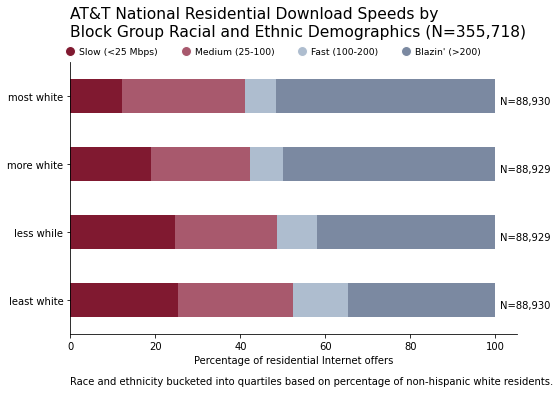

In [13]:
race(att)

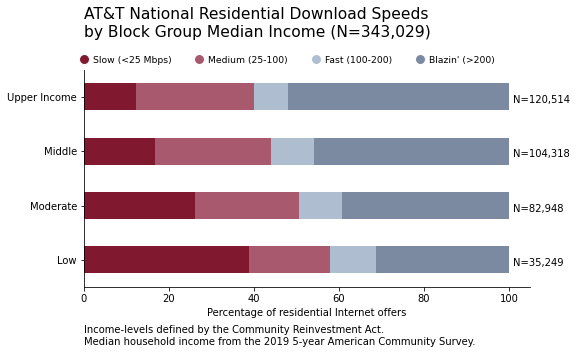

In [14]:
income(att)

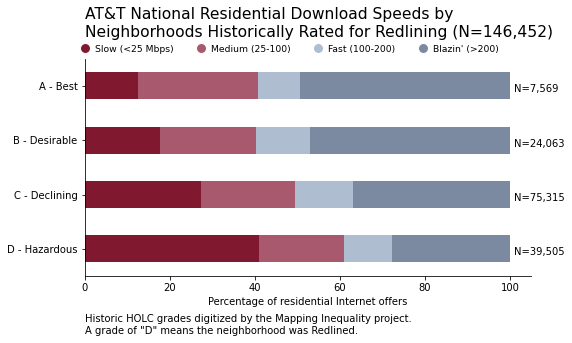

In [15]:
redlining(att)

## City by City

atlanta


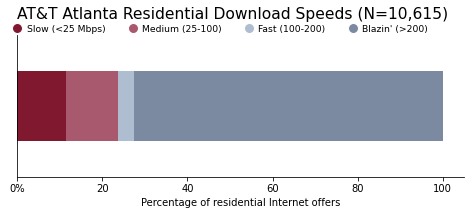

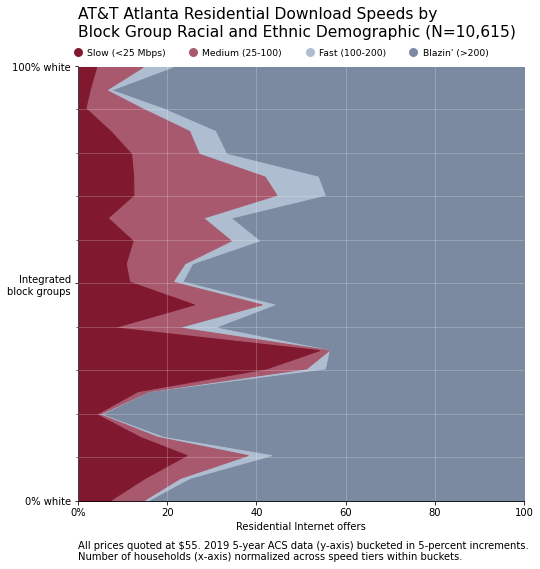

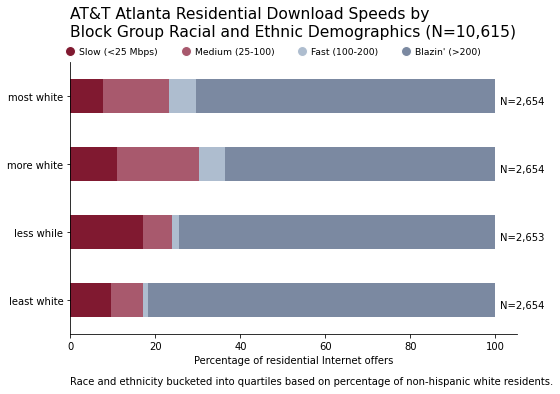

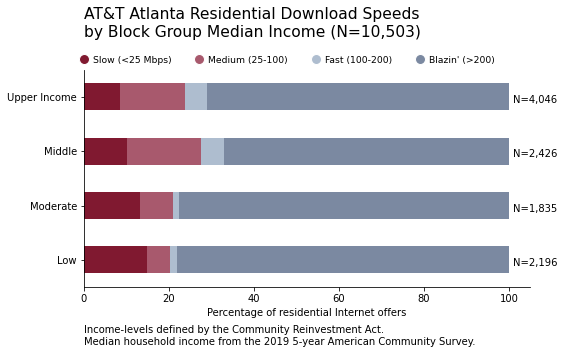

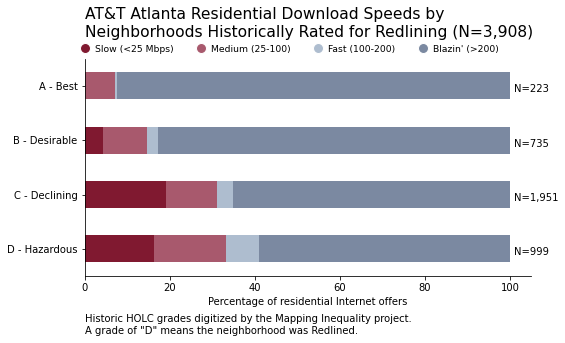

*******************************************************************************
charleston


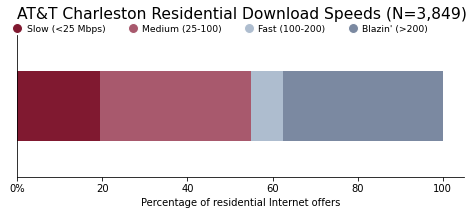

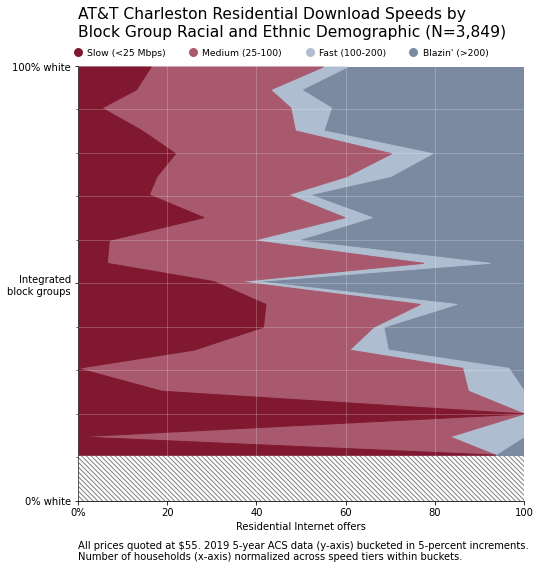

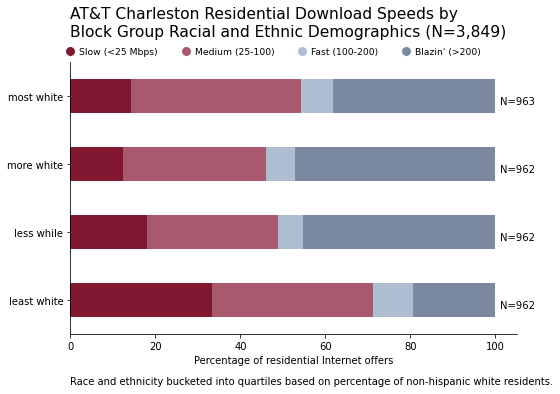

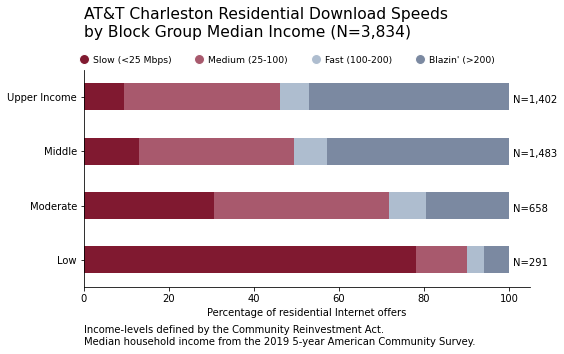

*******************************************************************************
charlotte


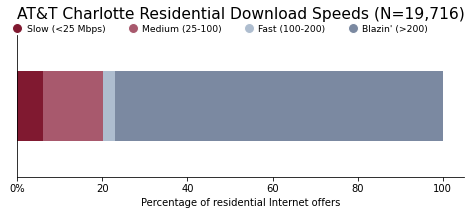

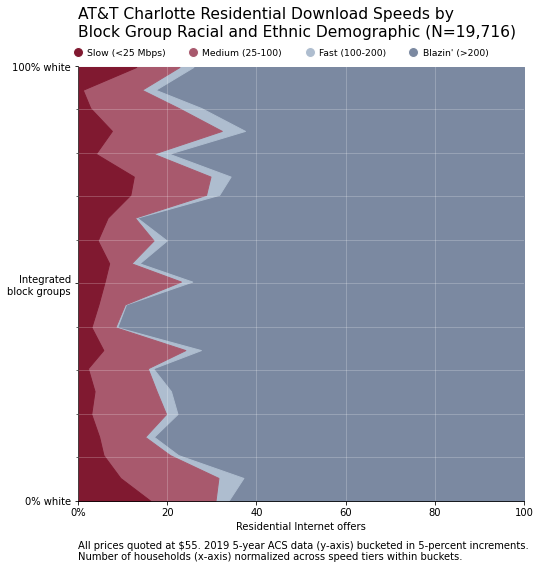

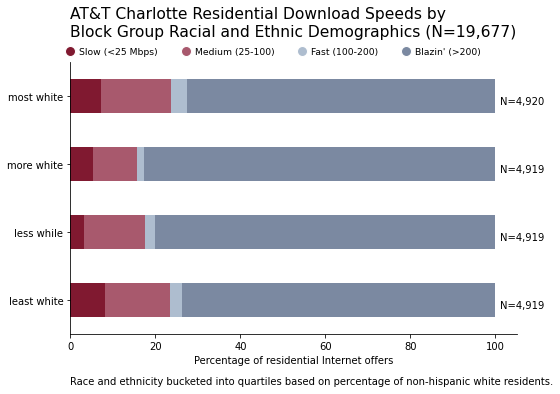

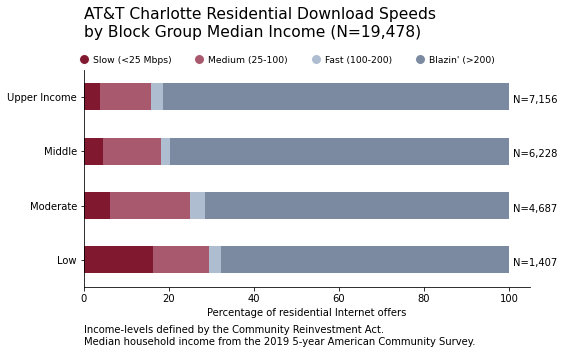

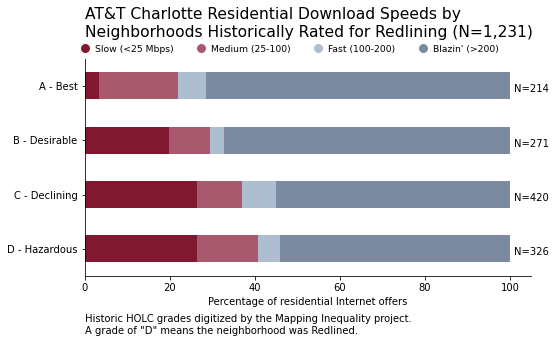

*******************************************************************************
chicago


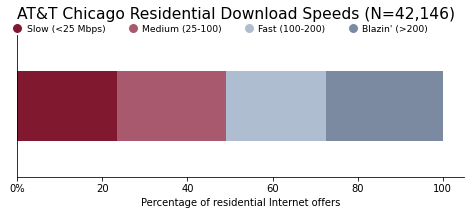

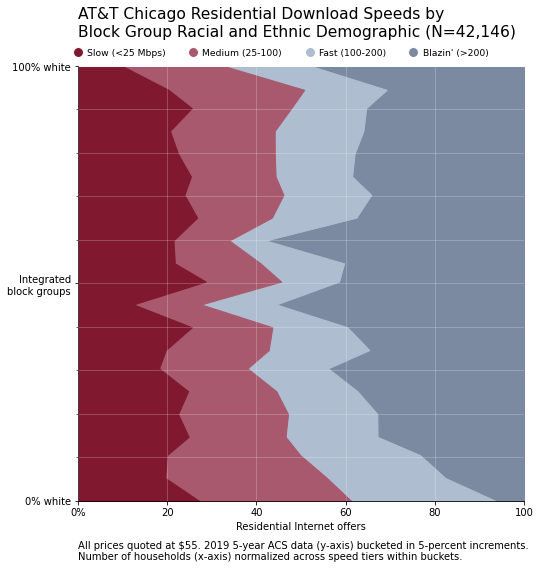

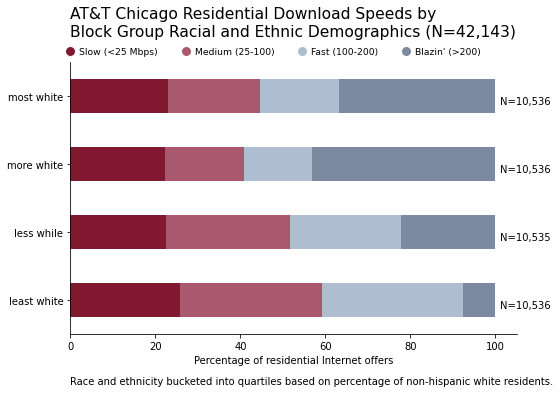

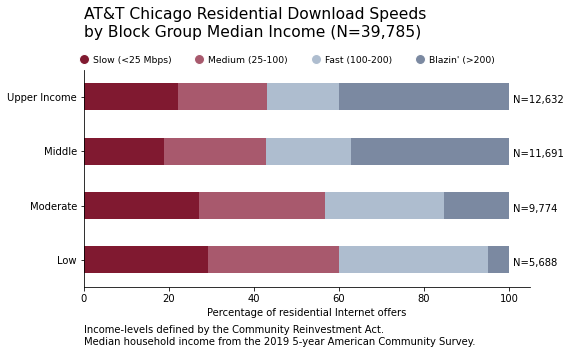

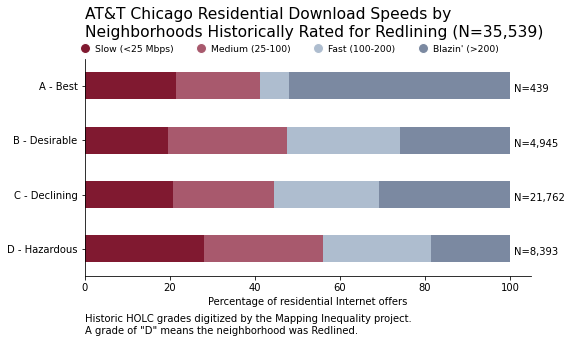

*******************************************************************************
cleveland


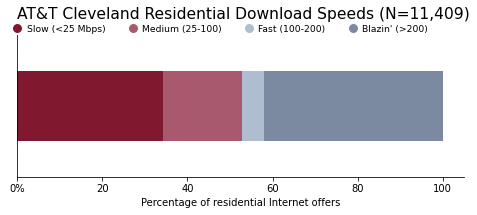

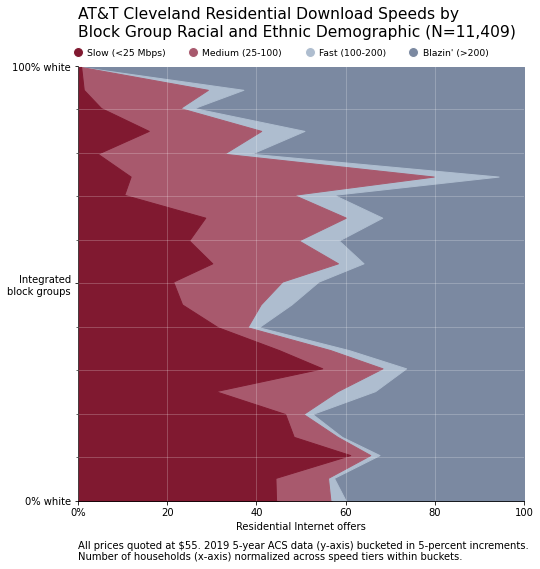

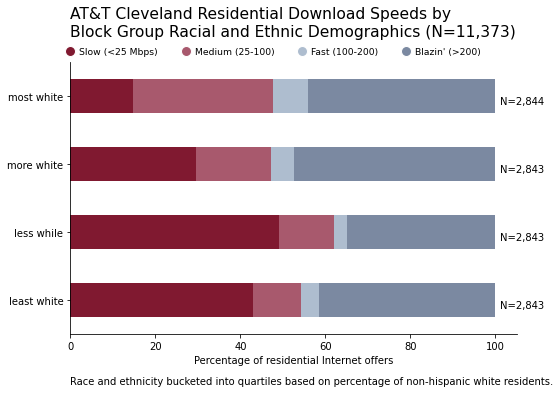

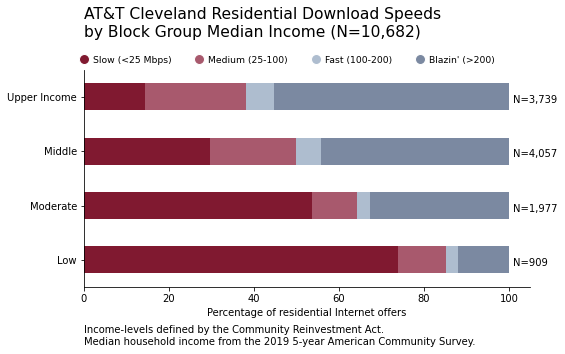

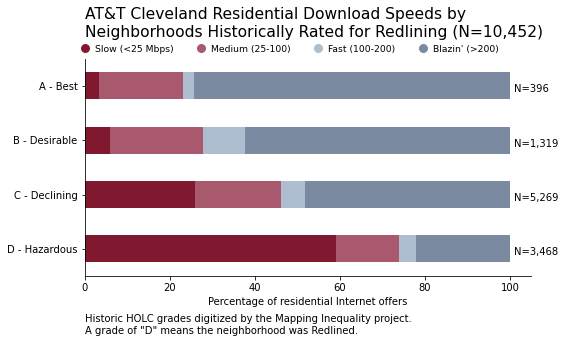

*******************************************************************************
detroit


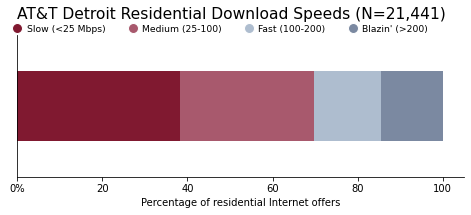

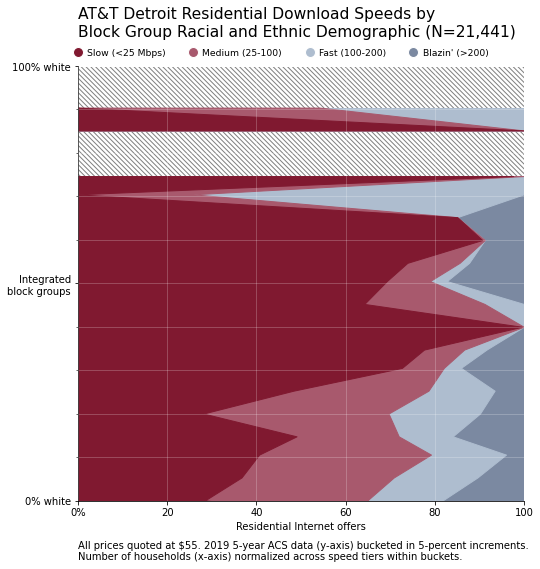

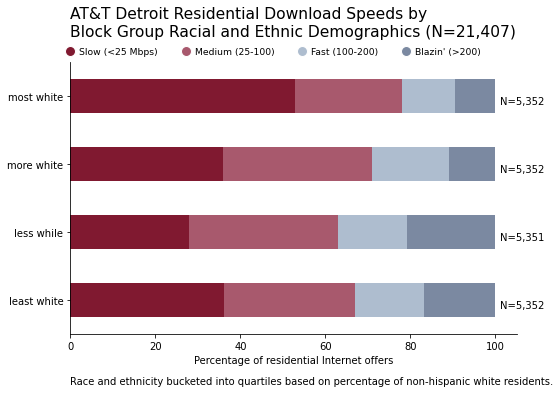

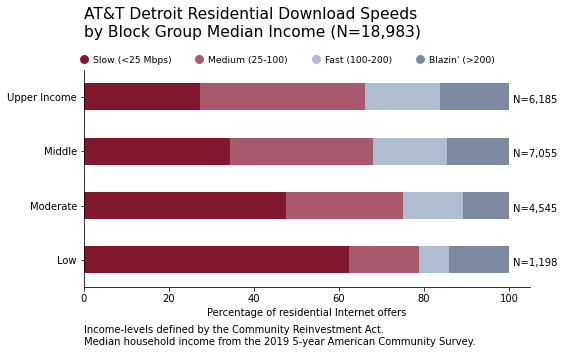

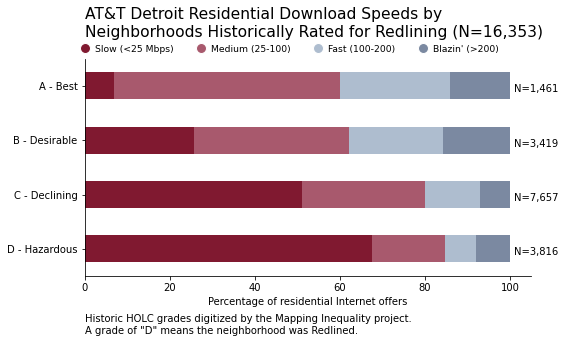

*******************************************************************************
houston


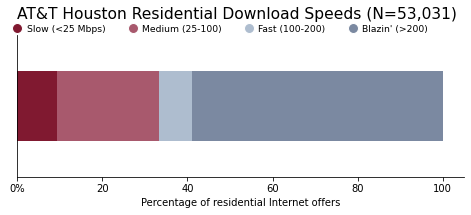

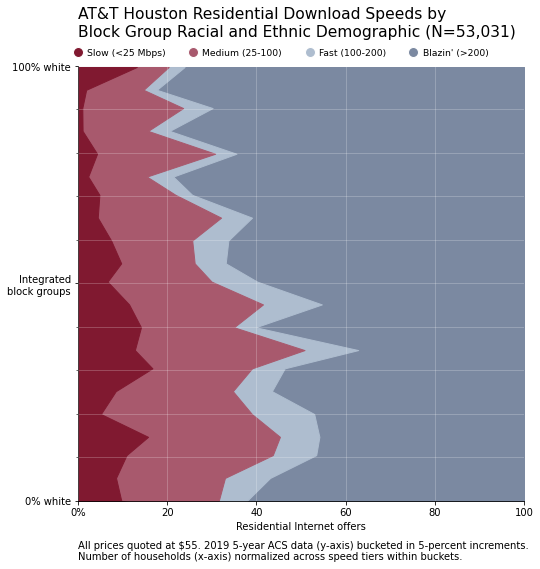

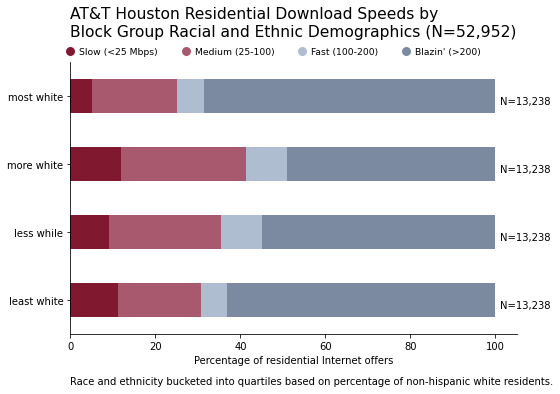

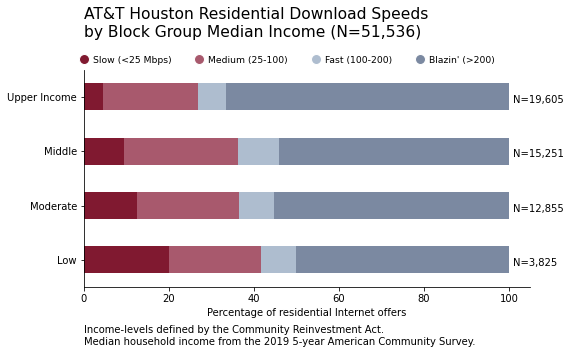

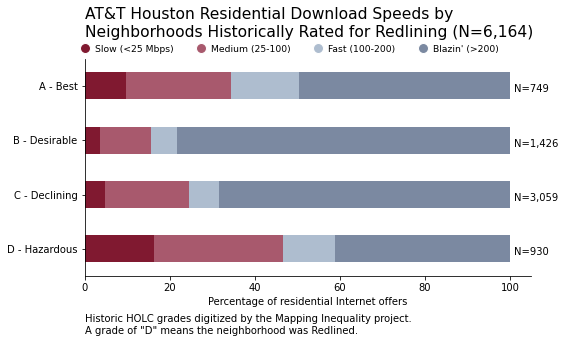

*******************************************************************************
huntsville


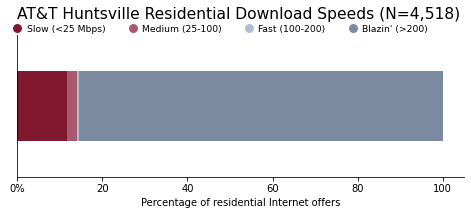

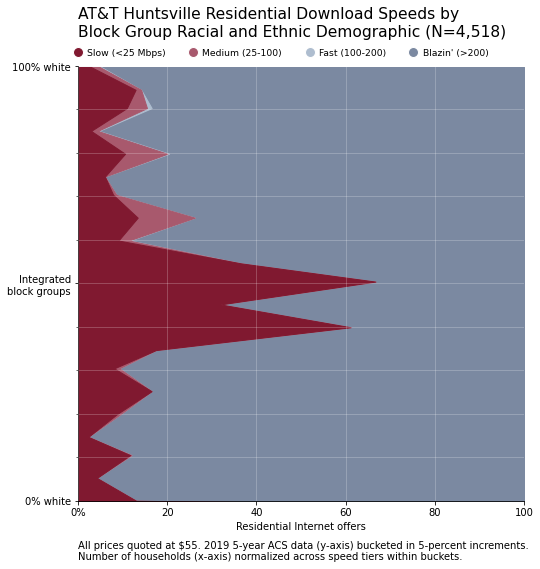

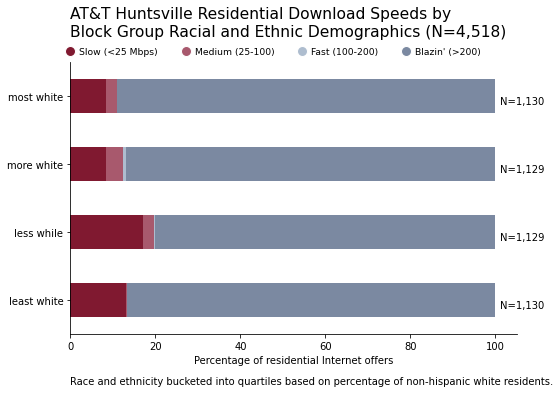

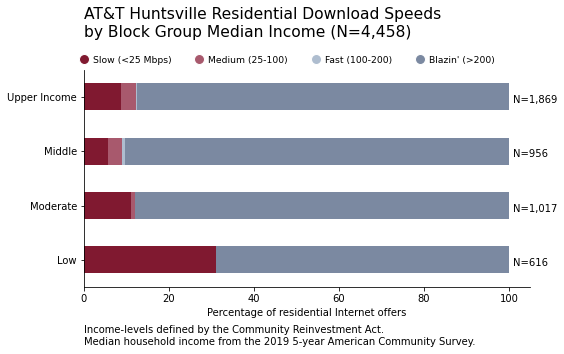

*******************************************************************************
indianapolis


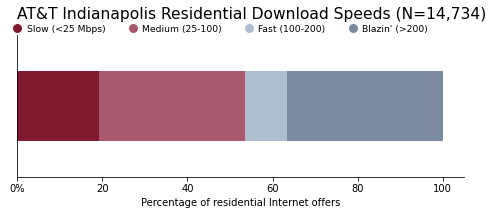

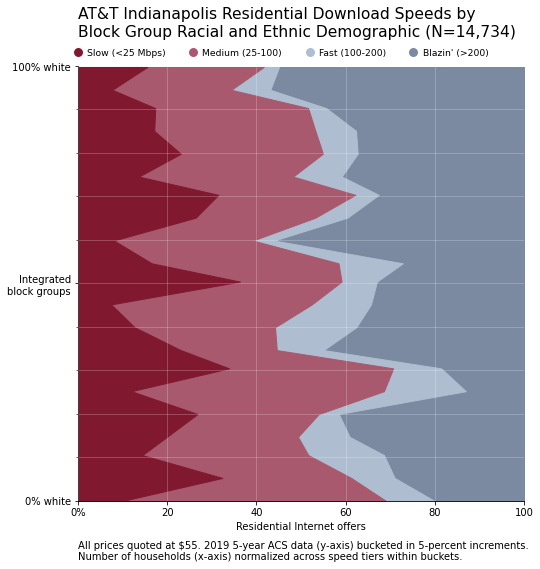

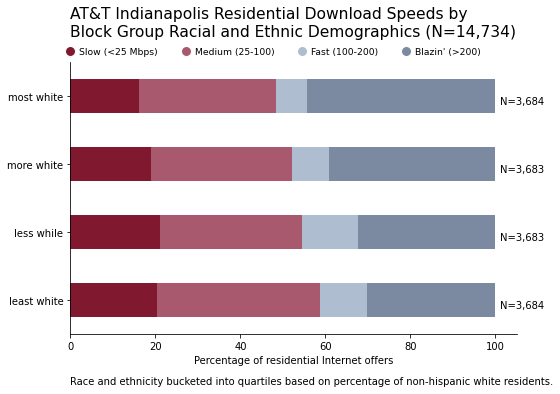

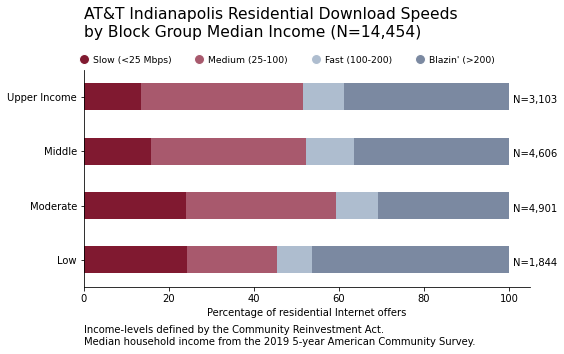

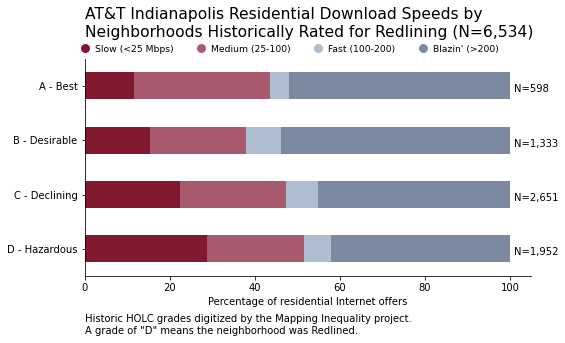

*******************************************************************************
jackson


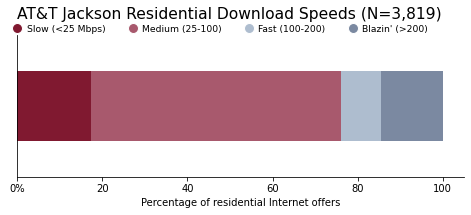

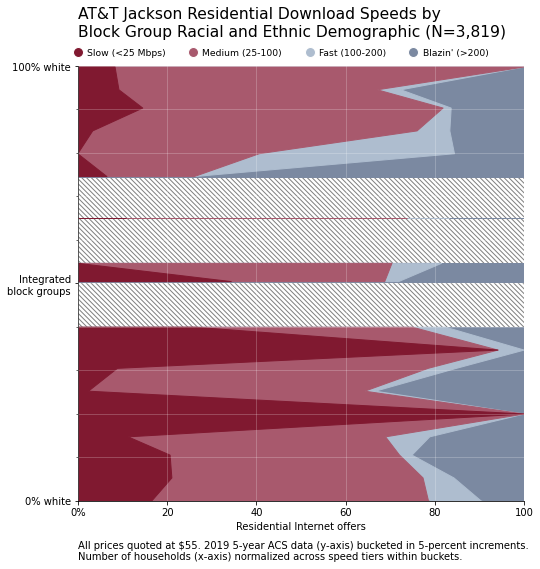

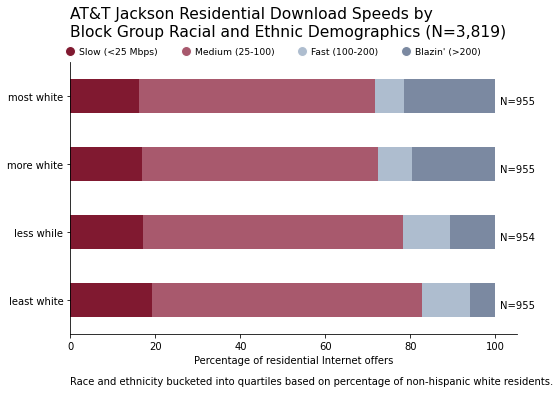

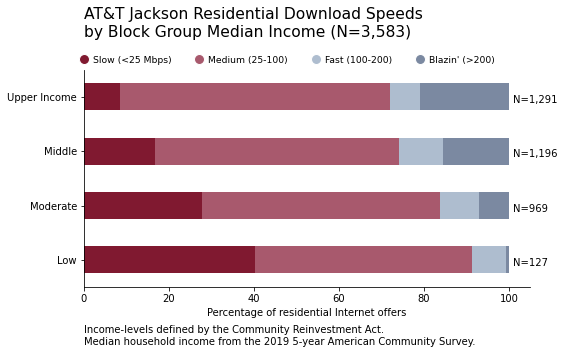

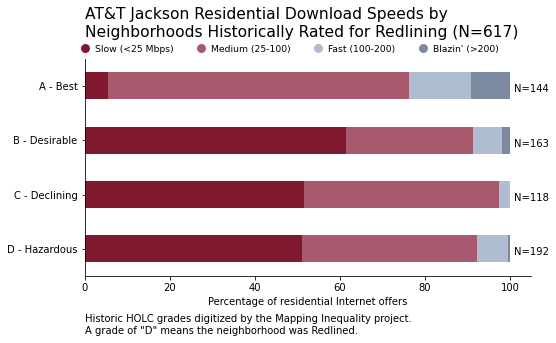

*******************************************************************************
jacksonville


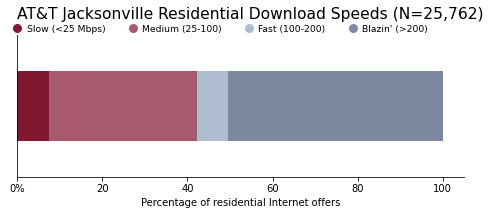

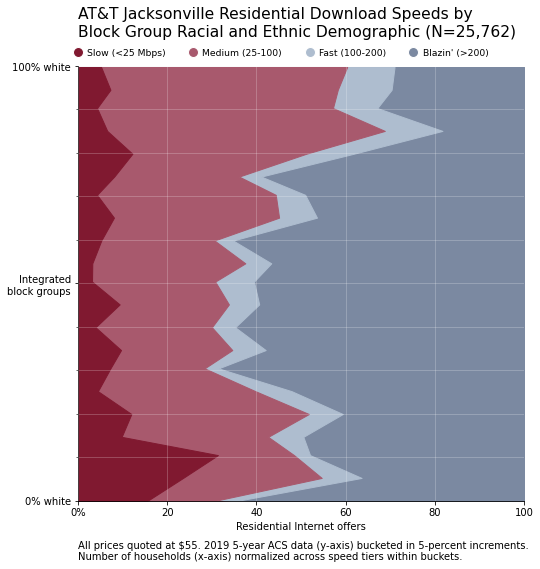

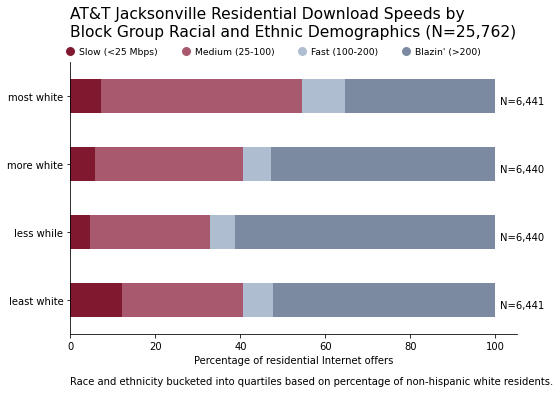

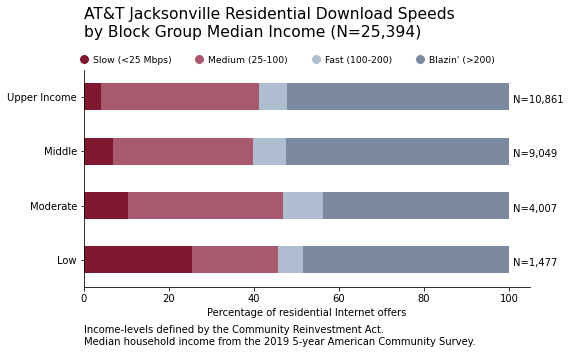

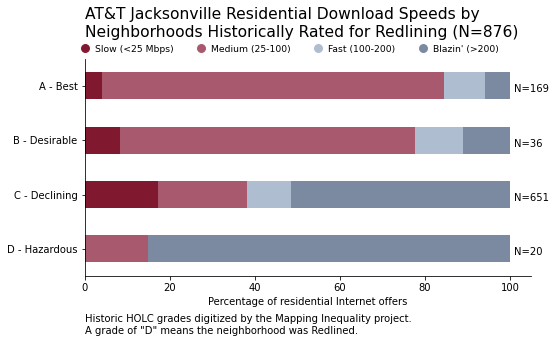

*******************************************************************************
kansas city


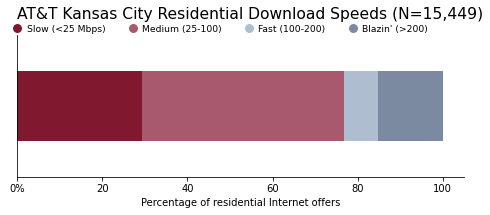

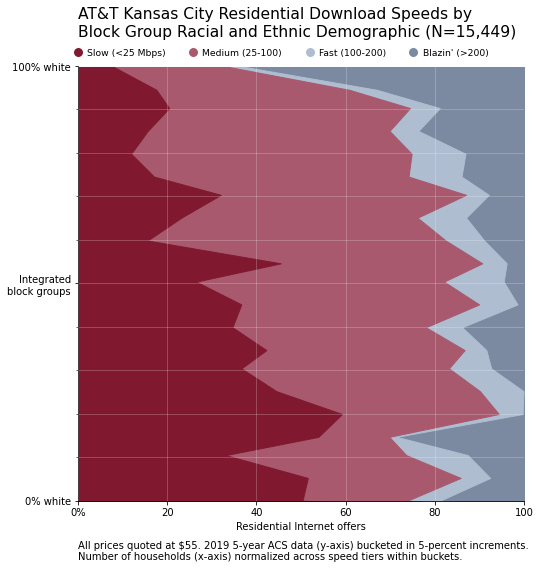

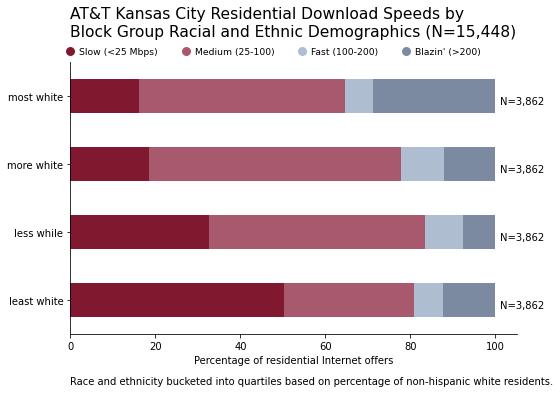

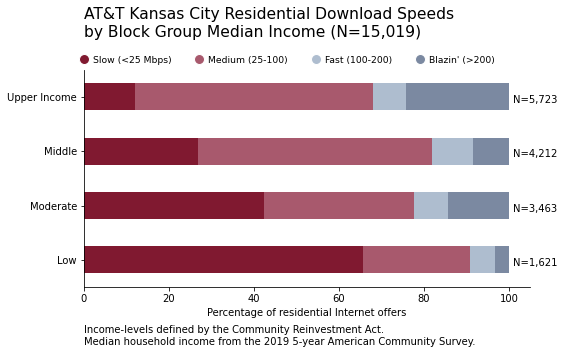

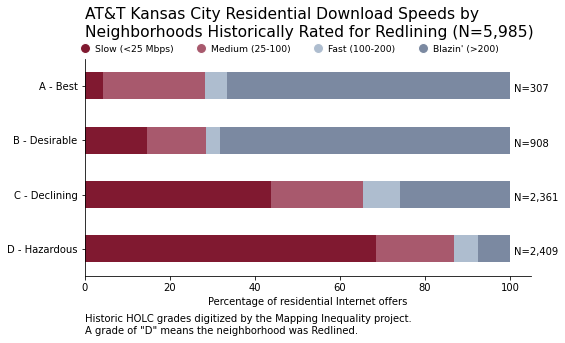

*******************************************************************************
little rock


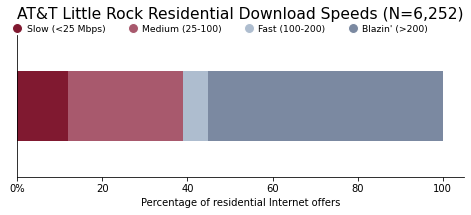

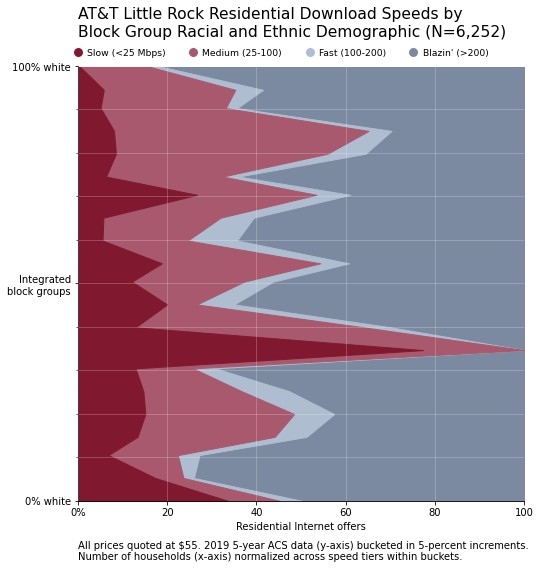

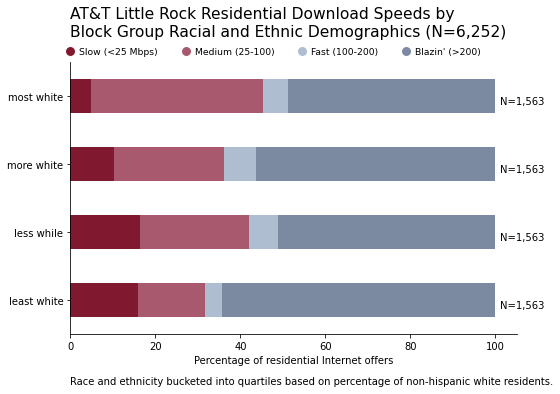

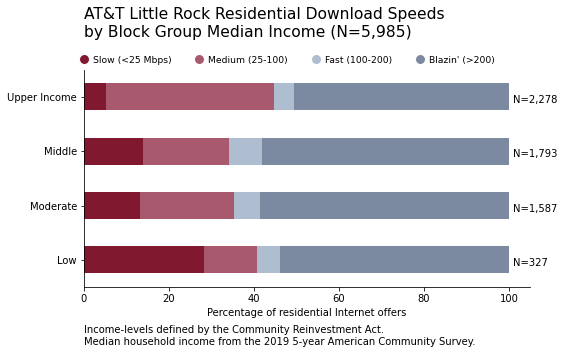

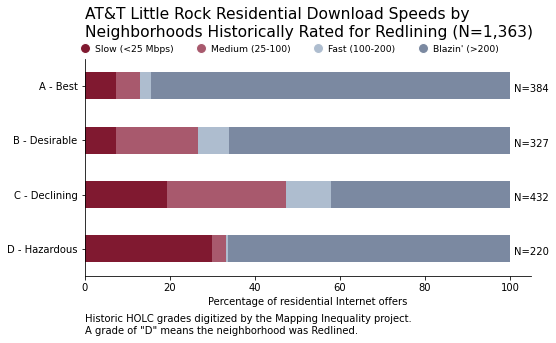

*******************************************************************************
los angeles


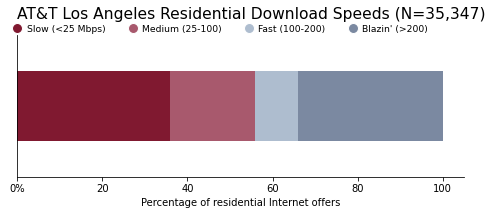

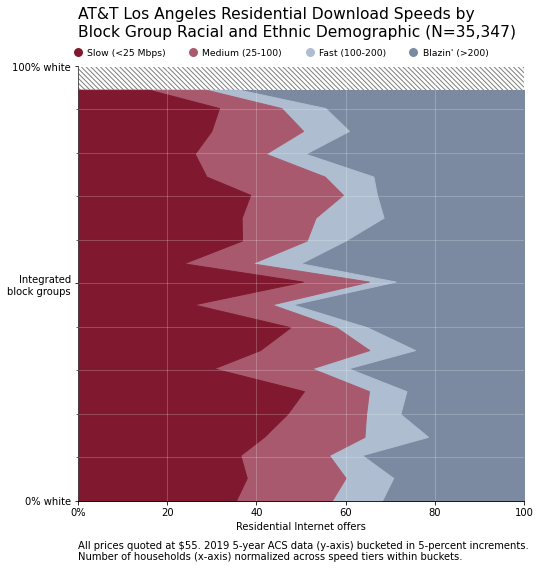

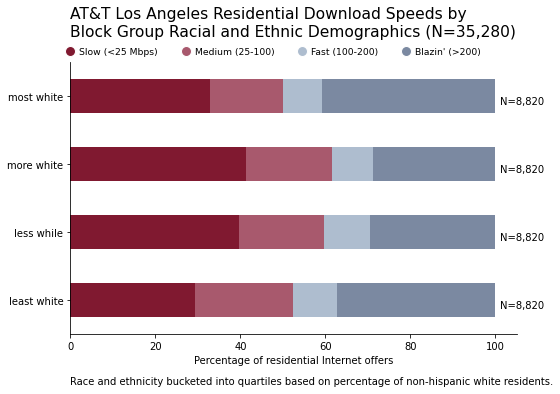

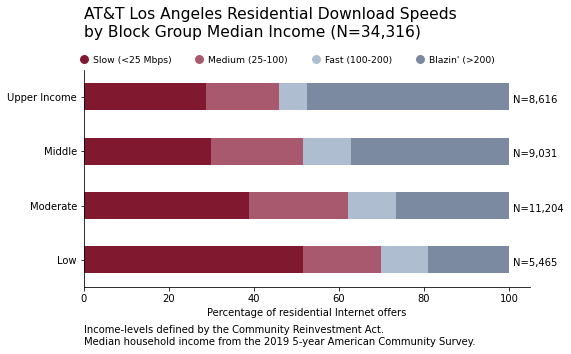

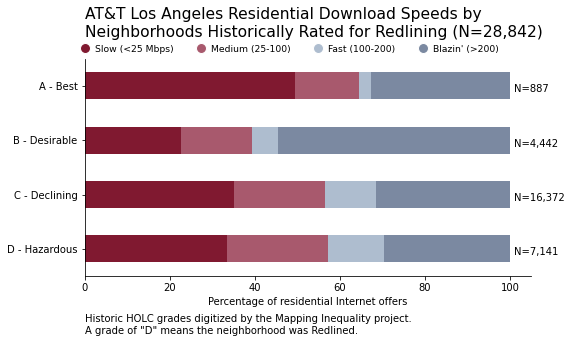

*******************************************************************************
louisville


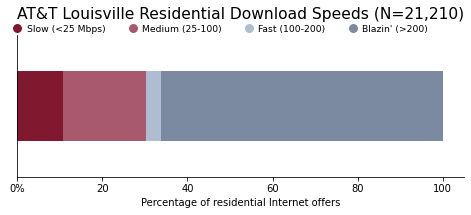

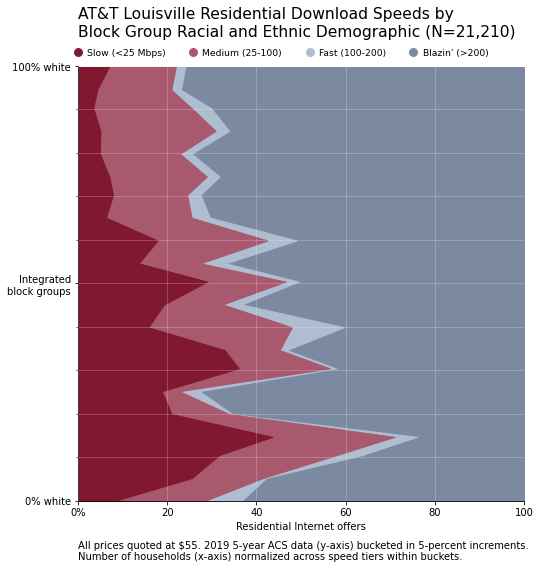

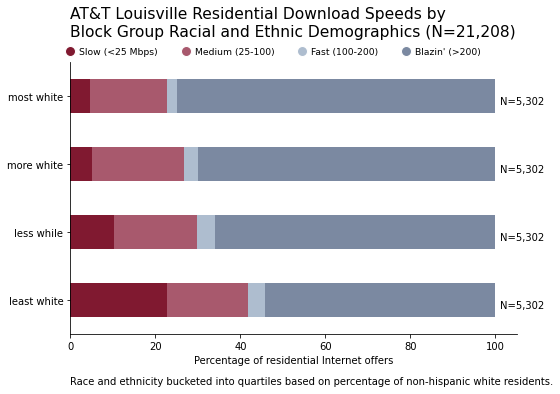

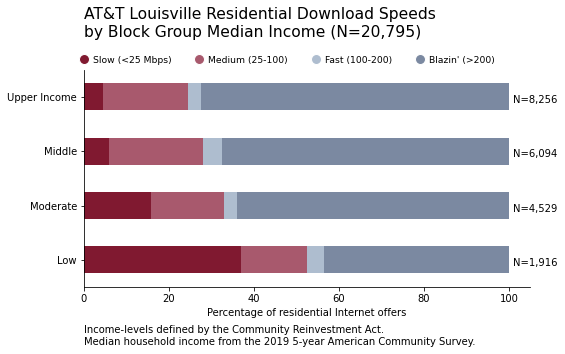

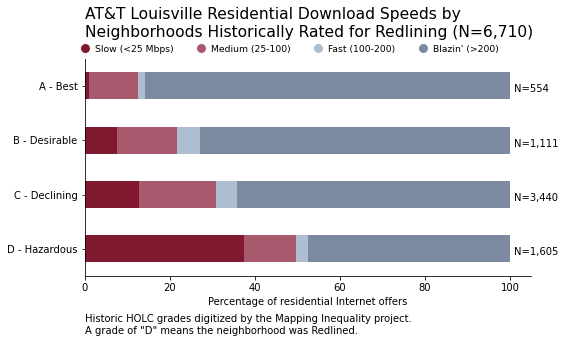

*******************************************************************************
memphis


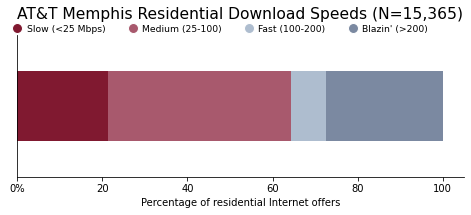

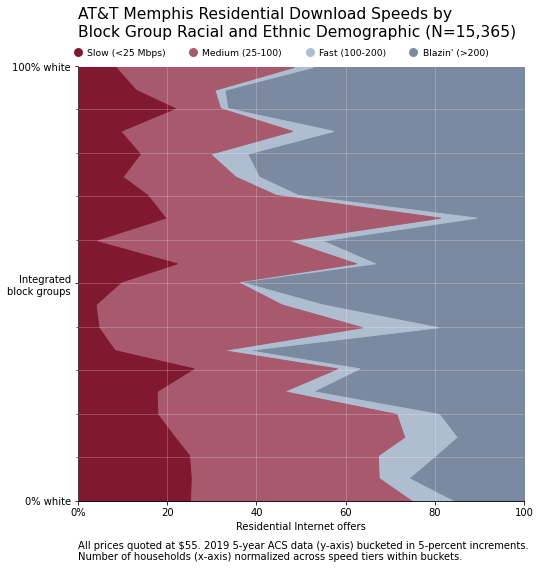

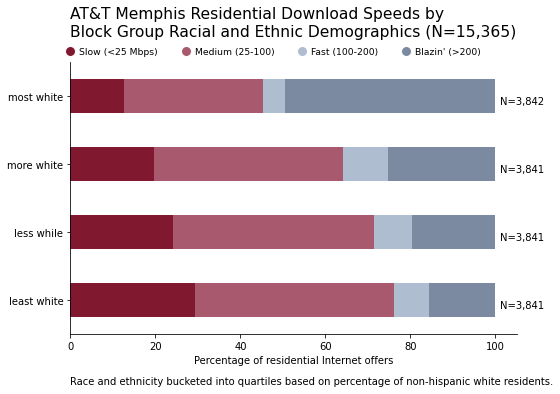

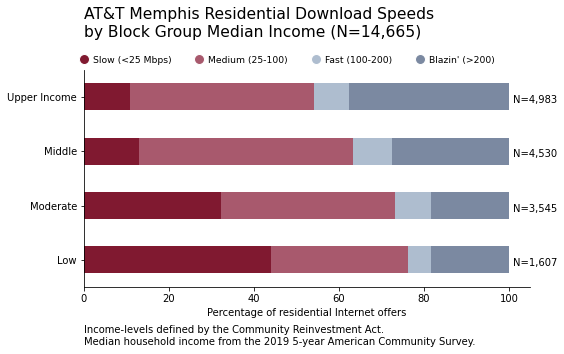

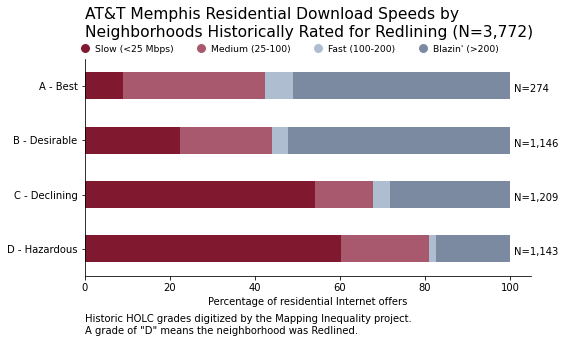

*******************************************************************************
milwaukee


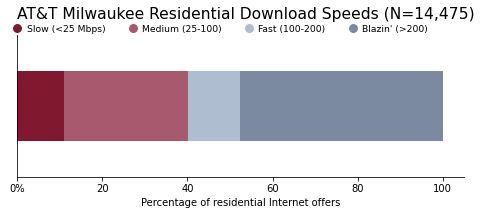

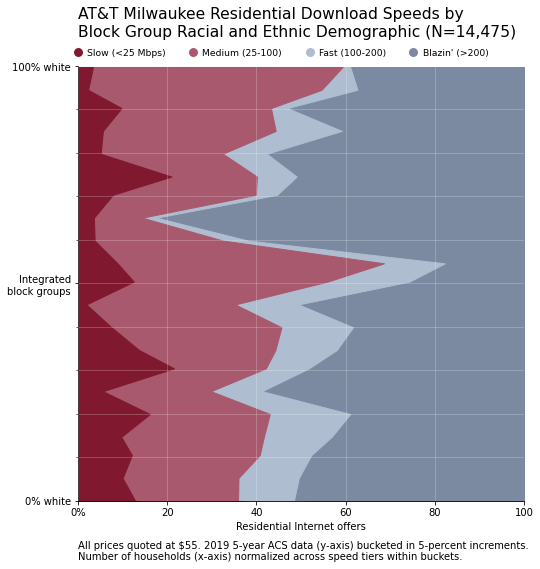

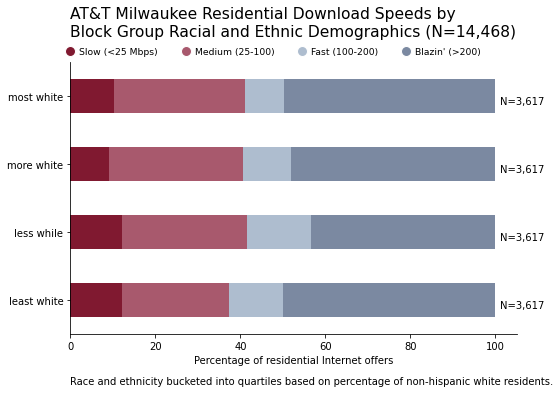

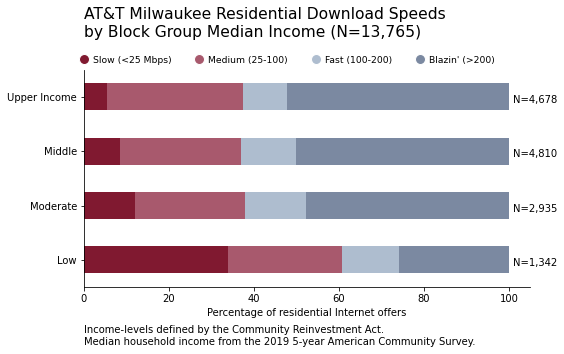

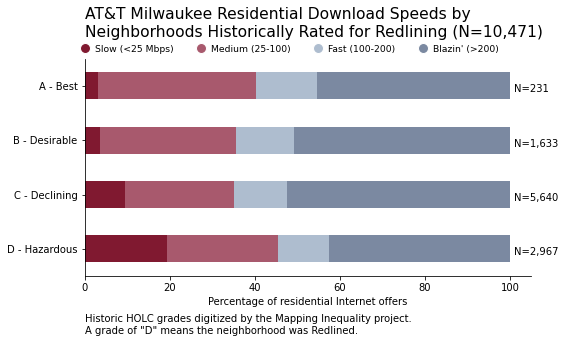

*******************************************************************************
new orleans


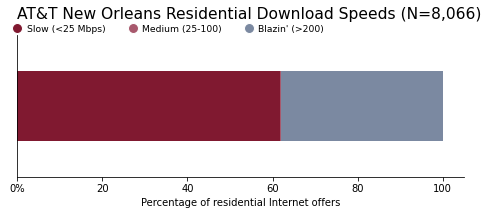

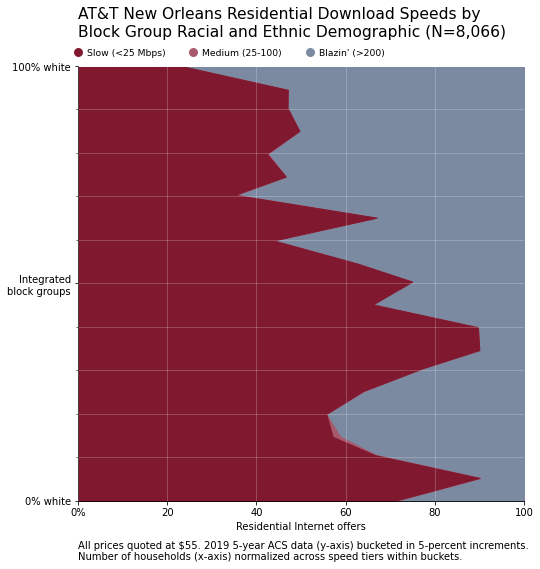

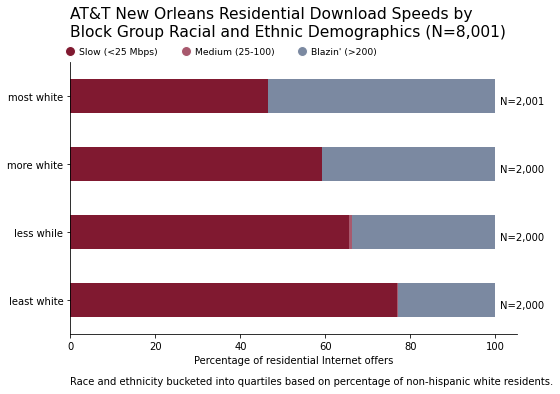

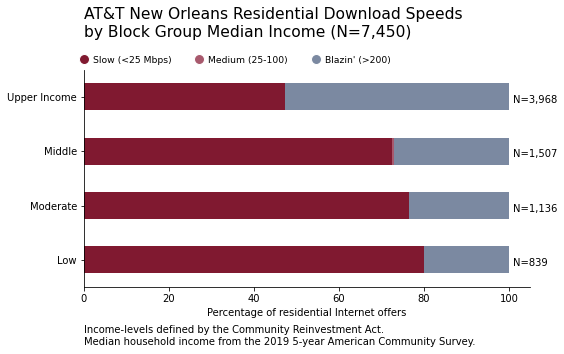

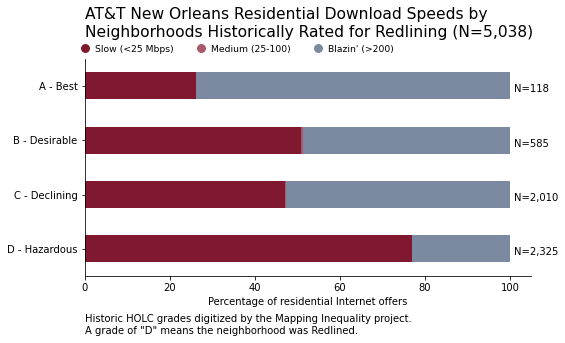

*******************************************************************************
oklahoma city


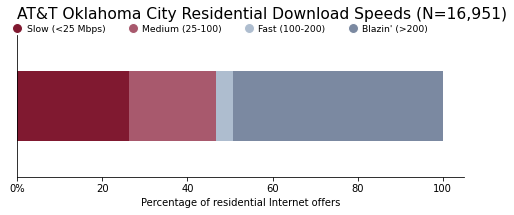

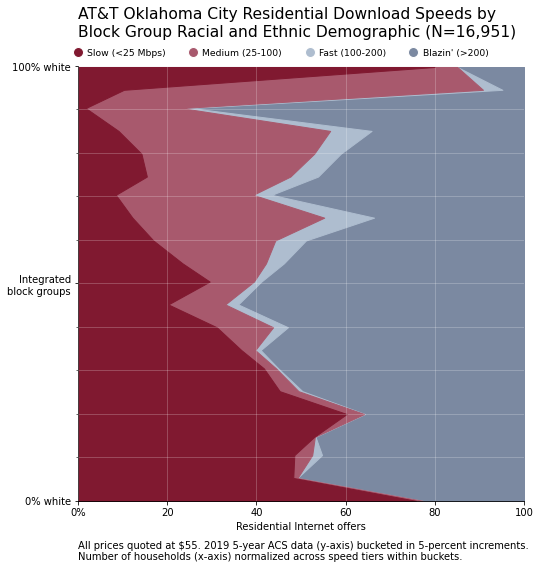

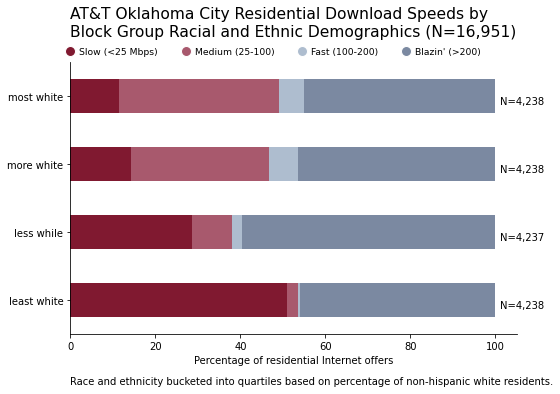

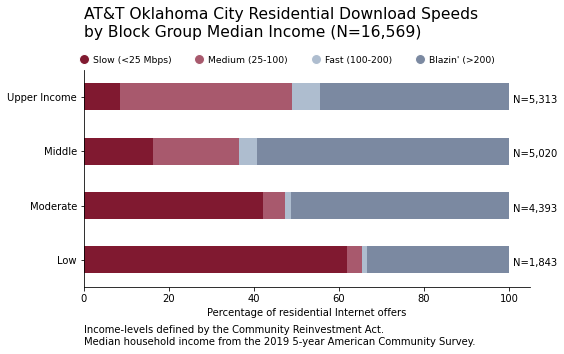

*******************************************************************************
wichita


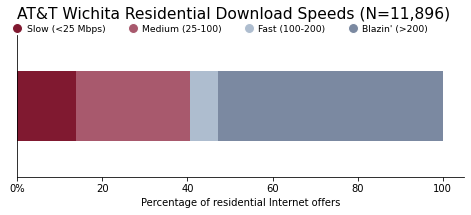

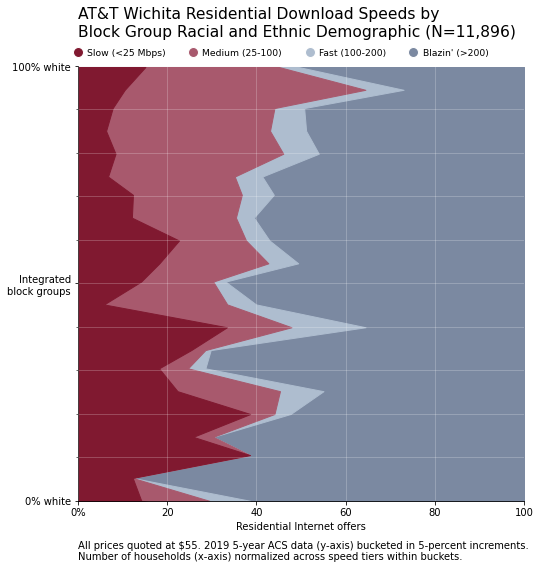

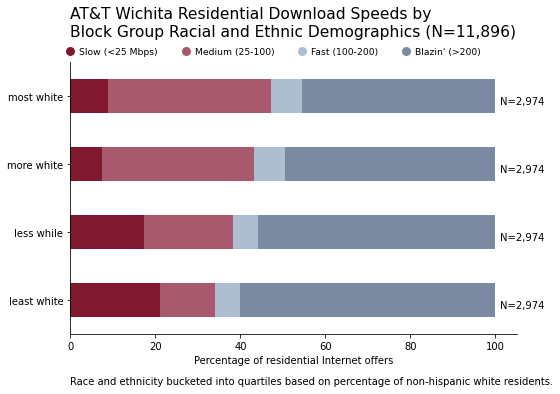

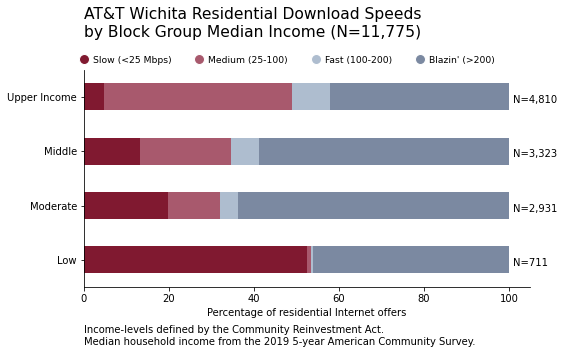

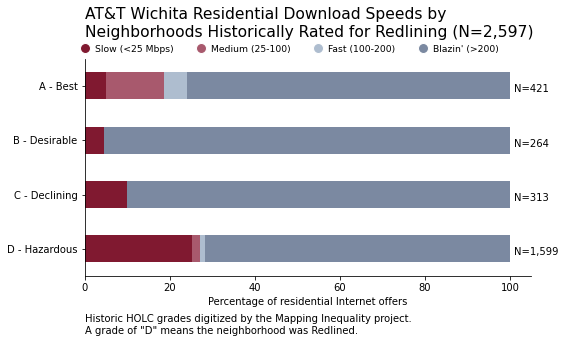

*******************************************************************************


In [16]:
for city, _df in att.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title())
    plot_race(_df, location=city.title())
    race(_df, location=city.title())
    income(_df, location=city.title())
    redlining(_df, location=city.title())
    print("*" * 79)

## One city's graphs as an example

In [17]:
from pandas.api.types import CategoricalDtype
from analysis import income_labels

In [18]:
# outputs
fn_fig3a = '../data/output/figs/fig3_income.csv'
fn_fig3b = '../data/output/figs/fig3_race.csv'
fn_fig3c = '../data/output/figs/fig3_redline.csv'

In [19]:
df_city = bucket_and_bin(att[att.major_city == 'louisville'])

In [20]:
df_city.loc[:, 'income_level'] = df_city['income_level'].astype(
     CategoricalDtype(income_labels, ordered=True)
).copy(deep=True)

to_plot = (df_city.groupby('income_level').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3a)

In [21]:
to_plot = (df_city.groupby('race_quantile').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3b)

In [22]:
to_plot = (df_city.groupby('redlining_grade').speed_down_bins
             .value_counts(normalize=True)
             .sort_index() * 100 ).unstack()
to_plot.to_csv(fn_fig3c)